In [8]:
import os
import pandas
import csv
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn import cross_validation, tree, linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


import os
import pefile
import pandas as pd

class PEFile:
    
    
    def __init__(self, filename):
        self.pe = pefile.PE(filename, fast_load=True)
        self.filename = filename
        self.DebugSize = self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[6].Size
        self.DebugRVA = self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[6].VirtualAddress
        self.ImageVersion = self.pe.OPTIONAL_HEADER.MajorImageVersion
        self.OSVersion = self.pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
        self.ExportRVA = self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[0].VirtualAddress
        self.ExportSize = self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[0].Size
        self.IATRVA = self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[12].VirtualAddress
        self.ResSize = self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[2].Size
        self.LinkerVersion = self.pe.OPTIONAL_HEADER.MajorLinkerVersion
        self.NumberOfSections = self.pe.FILE_HEADER.NumberOfSections
        self.StackReserveSize = self.pe.OPTIONAL_HEADER.SizeOfStackReserve
        self.Dll = self.pe.OPTIONAL_HEADER.DllCharacteristics
        self.TimeDateStamp = self.pe.FILE_HEADER.TimeDateStamp
        self.NumberOfSymbol = self.pe.FILE_HEADER.NumberOfSymbols
        self.PointerToSymbolTable = self.pe.FILE_HEADER.PointerToSymbolTable
        self.SizeOfOptionalHeader = self.pe.FILE_HEADER.SizeOfOptionalHeader
        self.Characteristics = self.pe.FILE_HEADER.Characteristics
        self.Machine = self.pe.FILE_HEADER.Machine
        self.Checksum = self.pe.OPTIONAL_HEADER.CheckSum
        self.SizeOfHeaders = self.pe.OPTIONAL_HEADER.SizeOfHeaders
        self.SizeOfCode = self.pe.OPTIONAL_HEADER.SizeOfCode
        self.AddressOfEntryPoint = self.pe.OPTIONAL_HEADER.AddressOfEntryPoint
        self.ImageBase = self.pe.OPTIONAL_HEADER.ImageBase
        self.NumberOfRvaAndSizes = self.pe.OPTIONAL_HEADER.NumberOfRvaAndSizes
        self.SizeOfHeapReserve = self.pe.OPTIONAL_HEADER.SizeOfHeapReserve
        self.SizeOfStackReserve = self.pe.OPTIONAL_HEADER.SizeOfStackReserve
        self.SizeOfImage = self.pe.OPTIONAL_HEADER.SizeOfImage
        self.MinorImageVersion = self.pe.OPTIONAL_HEADER.MinorImageVersion
        self.MajorImageVersion = self.pe.OPTIONAL_HEADER.MajorImageVersion
        self.MajorOperatingSystemVersion = self.pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
        

    def Construct(self):
        sample = {}
        #for attr, k in self.__dict__.iteritems():
        for attr, k in self.__dict__.items():
            if(attr != "pe"):
                sample[attr] = k
        return sample


def pe2vec(direct):
  
    dataset = {}
    for subdir, dirs, files in os.walk(direct):
        for f in files:
            file_path = os.path.join(subdir, f)
            try:
                
                pe = PEFile(file_path)
                dataset[str(f)] = pe.Construct()
            except Exception as e:
                print(e)
    return dataset



def vec2csv(dataset, filename):
    df = pd.DataFrame(dataset)
    infected = df.transpose() 
    

    infected.to_csv(filename, sep=',', encoding='utf-8')

In [9]:
Directory_Virus ="H:\Pe_files_malware"
Directory_Benign = "E:\Clean_Files"

Virus_Dataset = pe2vec(Directory_Virus)
Cleanfile_Dataset = pe2vec(Directory_Benign)

vec2csv(Virus_Dataset, 'Virus_Dataset.csv');
vec2csv(Cleanfile_Dataset, 'Cleanfile_Dataset.csv');


'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f9d03853c22067434a4e4042e9ce2624': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f9d03853c22067434a4e4042e9ce2624'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fb260c5435baa1c926b64d7816f2fff5': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fb260c5435baa1c926b64d7816f2fff5'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.

Unable to access file 'H:\Pe_files_malware\VirusShare_fa1841d94a4e35d3deb8698b763f4d74': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fa1841d94a4e35d3deb8698b763f4d74'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe22224355726a187e63396fb431f095': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe22224355726a187e63396fb431f095'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fab1d1f612c80855346e66ed5f7d16a8': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fab1d1f612c80855346e66ed5f7d16a8'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_ma

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe8dfd5b92675625d23d45bf0f1e6c57': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe8dfd5b92675625d23d45bf0f1e6c57'
Unable to access file 'H:\Pe_files_malware\VirusShare_feafea5311f5de94ba95221c5bb1c974': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_feafea5311f5de94ba95221c5bb1c974'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fbfdec1e606f22acbf2e14ba844b8aed':

Unable to access file 'H:\Pe_files_malware\VirusShare_2e543503bc0fb782871cfe2a1948db71': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_2e543503bc0fb782871cfe2a1948db71'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fd08d9cccfc2fdf940b9903ab1b16910': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fd08d9cccfc2fdf940b9903ab1b16910'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.

'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fea0a2d2537d431c8ed6d4117c6525f4': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fea0a2d2537d431c8ed6d4117c6525f4'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe5f1bfab9f617238e059a7b7daef17f': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe5f1bfab9f617238e059a7b7daef17f'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fde1793d01561ea67eebd22a8e73af92': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fde1793d01561ea67eebd22a8e73af92'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS He

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f8ec934fb331a39e0a219f6bbf1382c9': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f8ec934fb331a39e0a219f6bbf1382c9'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f9de61baf2dd7aa5fee13a813670f5d8': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f9de61baf2dd7aa5fee13a813670f5d8

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fc10401823170f0021bcca229c0fd000': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fc10401823170f0021bcca229c0fd000'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff734262a348ed41e84c8b945dff4dfc': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff734262a348ed41e84c8b945dff4dfc'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fcf4b25de5497fe9a455ca705312b8fa': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fcf4b25de5497fe9a455ca705312b8fa'
Unable to access file 'H:\Pe_files_malware\VirusShare_fd856db1a5432c2f1537afd7c795ea93': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fd856db1a5432c2f1537afd7c795ea93'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_29107b338e83a6dc386e8a64ac6aa519': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_29107b338e83a6dc386e8a64ac6aa519'
'DOS He

Unable to access file 'H:\Pe_files_malware\VirusShare_f99de850580ad5fe7528f5643218680a': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f99de850580ad5fe7528f5643218680a'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff78d77434442aafdef39e91b87332e8': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff78d77434442aafdef39e91b87332e8'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f88297eba343670a71c2142289fc585f': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f88297eba343670a71c2142289fc585f'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe8c98100890f6e0e2b016910745ea58': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe8c98100890f6e0e2b0

'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_faadb7ea935785deafa32149d98adfbc': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_faadb7ea935785deafa32149d98adfbc'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe1c13bd0fc7d95d017420150fac73a7': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe1c13bd0fc7d95d017420150fac73a7'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fb3e

Unable to access file 'H:\Pe_files_malware\VirusShare_ffde75196656e6808be95bdacbe61985': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ffde75196656e6808be95bdacbe61985'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_feb1936b855d3a112a964d9e31fac254': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_feb1936b855d3a112a964d9e31fac254'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff0ff5f5c01e457fcbb8920a18e87d6d': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff0ff5f5c01e457fcbb8920a18e87d6d'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff03c81760fa921fbb58eabbbd9fad68': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff03c81760fa921fbb58eabbbd9fad68'
Unable to access file 'H:\Pe_files_malware\Vir

'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe0a28520a6d51c2dbb62104cf36bf12': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe0a28520a6d51c2dbb62104cf36bf12'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fd2d947481b823b621c341aeaedb4a56': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fd2d947481b823b621c341aeaedb4a56'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fd59baa8593b0f2d1e8978515d753bf1': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fd59baa8593b0f2d1e8978515d753bf1'
Unable to access file 'H:\Pe_files_malware\VirusShare_fd4bf7dc99f8c9ee2b0c2440fd37bbed': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\V

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_feaa59a5a3f2cc03bd8a986285f85447': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_feaa59a5a3f2cc03bd8a986285f85447'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fbed989c4945073b8264be991f72432b': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fb

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff8c874f50f0cdae5e797cbe5cc3f5a3': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff8c874f50f0cdae5e797cbe5cc3f5a3'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access fi

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff2cb879d1b213f33fba8b34b1e71bf2': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff2cb879d1b213f33fba8b34b1e71bf2'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff873ca7e11026a4d45b1fa0f12928c0': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff873ca7e11026a4d45b1fa0f12928c0'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe5b830c8d3bff9f8f2cf46a308507fe': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe5b830c8d3bff9f8f2cf46a308507fe'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS He

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe3af25f7e27c0f7e35ccc261957c1cb': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe3af25f7e27c0f7e35ccc261957c1cb'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ffadc1366fe2ba8d0b816e09378a2ce6': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ffadc1366fe2ba8d0b816e09378a2ce6'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f523b223f36ede3d6e9dd203f7a79a00': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f523b223f36ede3d6e9dd203f7a79a00'
Unable 

Unable to access file 'H:\Pe_files_malware\VirusShare_fc90bd2dd77dcad0973d01cbeea89800': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fc90bd2dd77dcad0973d01cbeea89800'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fb0acdf652a8c31676a8e5ce90118607': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fb0acdf652a8c31676a8e5ce90118607'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe7d33f525f80b668c03de1fea43f65a': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe7d33f525f80b668c03de1fea43f65a'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS He

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff3f3d710b52a63db20a98fa342f4d95': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff3f3d710b52a63db20a98fa342f4d95'
Unable to access file 'H:\Pe_files_malware\VirusShare_efd11cf79d427c50999c3c44ae463abb': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_efd11cf79d427c50999c3c44ae463abb'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.

Unable to access file 'H:\Pe_files_malware\VirusShare_fe48ceab36a3a83713c64e3a02e16c87': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe48ceab36a3a83713c64e3a02e16c87'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ffe656f9660f0cde762885b55668e957': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ffe656f9660f0cde762885b55668e957'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fb50e8761b2b52fdf6439380cfda5920': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fb50e8761b2b52fdf6439380cfda5920'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff6ee0e9f8b6d25a02bbfa1ddfc4b109': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\V

Unable to access file 'H:\Pe_files_malware\VirusShare_ffd82766b836517aced5ee6e1988e0f2': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ffd82766b836517aced5ee6e1988e0f2'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe4ee2daab4564721034ae0d6a8a2318': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe4ee2daab4564721034ae0d6a8a2318'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff8b325ac44bbfcde66fac8869e8a244': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff8b325ac44bbfcde66fac8869e8a244'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fa3075f49bcf6

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fa6f8b21924d0288cc91e20e710608e0': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fa6f8b21924d0288cc91e20e710608e0'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ffd33f11c8b5d9d62d033b0b17c59aec': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ffd33f11c8b5d9d62d033b0b17c59aec'
Unable to access file 'H:\Pe_files_malware\VirusShare_ffa84945f1d3cdacf199b21033849f61': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ffa84945f1d3cdacf199b21033849f61'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_ma

Unable to access file 'H:\Pe_files_malware\VirusShare_fbb4c32e0777ab67eb4c684a585a5df8': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fbb4c32e0777ab67eb4c684a585a5df8'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f7a4cf4d6ae4ff0d6dea5cf4f72e03db': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f7a4cf4d6ae4ff0d6dea5cf4f72e03db'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fd186f1229d16a6f71da4d8e38c51a61': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fd186f1229d16a6f71da4d8e38c51a61'
Unable to access file 'H:\Pe_files_malware\VirusShare_fce45162db1b34de608e25c529f0becf': [Errno 22] invalid mode ('rb') or file

'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fae5ea7b3e3a2beaa4f322e0122b5823': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fae5ea7b3e3a2beaa4f322e0122b5823'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f7ca6526f01b05043be974b65ee02235': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f7ca6526f01b05043be974b65ee02235'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fd0df2f8286101485736aff0fb72571d': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fd0df2f8286101485736aff0fb72571d'
Unable to access file 'H:\Pe_files_malware\VirusShare_f92ce704d2d46d4c645c9d11df7610d5': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f92ce704d2d46d4c645c9d11df7610d5'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fba6615e86effbd683faf1

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe6d3f2867a43a167f37c7ef2d00eec3': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe6d3f2867a43a167f37c7ef2d00eec3'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f7b0ac1081bb8daf0b1153e50a57d4f7': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f7b0ac1081bb8daf0b1153e50a57d4f7'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe2850fba46c9db05d23e7e4d9ed69f5': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe2850fba46c9db05d23e7e4d9ed69f5'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS He

'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fd91e5a795c745bca64e0b34f6cf7e5f': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fd91e5a795c745bca64e0b34f6cf7e5f'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fd48acae4e51d6f4dfc84b28248b70d3': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fd48acae4e51d6f4dfc84b28248b70d3'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe89a777df33d53948eaccb6919907c2': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe89a777df33d53948eaccb6919907c2'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_ma

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff1638733fbaf2f4a181d52a3aa1e315': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff1638733fbaf2f4a181d52a3aa1e315'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fdc87e655a9e47bff68f0bec9f43a7fb': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fdc87e655a9e47bff68f0bec9f43a7fb'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f8920158c7f442da1e5ee9c40132f224': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f8920158c7f442da1e5ee9c40132f224'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS He

Unable to access file 'H:\Pe_files_malware\VirusShare_fd23a878d0be4e31fc5f34c8fc15dd56': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fd23a878d0be4e31fc5f34c8fc15dd56'
Unable to access file 'H:\Pe_files_malware\VirusShare_fff8fa2e922665a3b11896a612bffe78': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fff8fa2e922665a3b11896a612bffe78'
Unable to access file 'H:\Pe_files_malware\VirusShare_fdac2879a77d6def353e5de42d283049': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fdac2879a77d6def353e5de42d283049'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ffa16779e450e7a5715382c30630c35c': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ffa16779e450e7a5715382c30630c35c'
list index out of range
Unable to access file 'H:\Pe_files_malware\VirusShare_feeea94adad29b750952d9f2d035d1ed': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_f

Unable to access file 'H:\Pe_files_malware\VirusShare_ff766dbcca50fbb623c52bc5a4f675b1': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff766dbcca50fbb623c52bc5a4f675b1'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe2e7f9bb2a8aafe8e118b0085fd0209': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe2e7f9bb2a8aafe8e118b0085fd0209'
Unable to access file 'H:\Pe_files_malware\VirusShare_f9d668c1acaea6a7261563e114d7f821': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f9d668c1acaea6a7261563e114d7f821'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f839cf042642c0b31d202e4e455de43a': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f839cf042642c0b31d202e4e455de43a'
Unable to access

Unable to access file 'H:\Pe_files_malware\VirusShare_fb7f700897d12502a6bb172318c979bc': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fb7f700897d12502a6bb172318c979bc'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fdf28d109020c3d152a74bbafae0fb0e': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fdf28d109020c3d152a74bbafae0fb0e'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fbef5887dfbebf87c40653e865a0aaf1': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fbef5887dfbebf87c40653e865a0aaf1'
Unable to access file 'H:\Pe_files_malware\VirusShare_fda666504dbffad82cc1f7c235e0b3b5': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fda666504dbffad82cc1f7c235e0b3b5'
'DOS Header magi

'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe98dc587778877ddbb9c4cbe6105750': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe98dc587778877ddbb9c4cbe6105750'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f8b4cdf9e49c95d5493ad24ef5e2e461': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f8b4cdf9e49c95d5493ad24ef5e2e461'
Unable to access file 'H:\Pe_files_malware\VirusShare_fd917b831e7ec653ce3f8270d2aedf8e': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fd917b831e7ec653ce3f8270d2aedf8e'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff4b74d3d5980e9c500d153d56dd1470': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff4b74d3d5980e9c500d153d56dd1470'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magi

Unable to access file 'H:\Pe_files_malware\VirusShare_fec58aae3d7e7538bfe8180095d9892d': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fec58aae3d7e7538bfe8180095d9892d'
Unable to access file 'H:\Pe_files_malware\VirusShare_fedfa05c81e1007a9e67244875fddd3d': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fedfa05c81e1007a9e67244875fddd3d'
Unable to access file 'H:\Pe_files_malware\VirusShare_fc664c1b451fc35d5ac4ee301748eaf1': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fc664c1b451fc35d5ac4ee301748eaf1'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff76a4a8fae6e8b99813667fa87f20e5': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff76a4a8fae6e8b99813667fa87f20e5'
list index out of range
Unable to access file 'H:\Pe_files_malware\VirusShare_f88e85a1b52f5f208da08ea38be05da9': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f88e8

Unable to access file 'H:\Pe_files_malware\VirusShare_fbce92056b5f7563478ae2a7e8746c1c': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fbce92056b5f7563478ae2a7e8746c1c'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ffce4ab04d38c9ccbe0cebe6d7f4a9a7': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ffce4ab04d38c9ccbe0cebe6d7f4a9a7'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f7c364e81efca16ebb305fd9826a573b': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f7c364e81efca16ebb305fd9826a573b'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fedf0f80280cdd4e0515421f119d4dd5': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\V

Unable to access file 'H:\Pe_files_malware\VirusShare_ff3935d4773f97ce91634f22cac381be': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff3935d4773f97ce91634f22cac381be'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff3097c05e8d0b946515ccf678e190d0': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff3097c05e8d0b946515ccf678e190d0'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fb9d6cb5608b58e2a516acb4a390c7d8': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fb9d6cb5608b58e2a516acb4a390c7d8'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff068498a0013

'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fea82d143f3878eea591b13fbbc09fb4': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fea82d143f3878eea591b13fbbc09fb4'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff93c18ba2f4f4e436eed9395792e6c6': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff93c18ba2f4f4e436eed9395792e6c6'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe914ab4d20a3c27d867b55246f4fb89': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe914ab4d20a3c27d867b55246f4fb89'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe6bd1d412af30a7290ecfd9b5a0c621': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe6bd1d412af30a7290ecfd9b5a0c621'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fb58f13847b153da09b7e8a85c6f0473': [Errno 22] invali

Unable to access file 'H:\Pe_files_malware\VirusShare_ffc73c1945aed7d40b61bfffeeec4bfb': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ffc73c1945aed7d40b61bfffeeec4bfb'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff26c127a464227d44607f2858fdfa4d': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff26c127a464227d44607f2858fdfa4d'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff87b9196b0f6306a4ba21cd8d1e743d': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff87b9196b0f6306a4ba21cd8d1e743d'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe15643aaa914

'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_f916fbe1fa77f887a67f18cb81853a41': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f916fbe1fa77f887a67f18cb81853a41'
Unable to access file 'H:\Pe_files_malware\VirusShare_fb654fa7581e835c4fbd7c10eb60a153': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fb654fa7581e835c4fbd7c10eb60a153'
Unable to access file 'H:\Pe_files_malware\VirusShare_f7f4abb5d3d5b635f4f7d5fe40348149': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_f7f4abb5d3d5b635f4f7d5fe40348149'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fafcfa4ac17b1e3588b656bf8f9cf554': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fafcfa4ac17b1e3588b656bf8f9cf554'
'DOS Header magi

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fea7d45009e625ea9311ea1e6f8160ff': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fea7d45009e625ea9311ea1e6f8160ff'
Unable to access file 'H:\Pe_files_malware\VirusShare_ff6324d386f48b977f73ae0cfc6ea483': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ff6324d386f48b977f73ae0cfc6ea483'
Unable to access file 'H:\Pe_files_malware\VirusShare_fca2c9e0b1d60f9bbe2ad7a27d39f315': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fca2c9e0b1d60f9bbe2ad7a27d39f315'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS He

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_ed07d3fc3a0413f8e9add530859c857e': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_ed07d3fc3a0413f8e9add530859c857e'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
Unable to access file 'H:\Pe_files_malware\VirusShare_fe4a4fa049fa9bcecc74e50144f3292e': [Errno 22] invalid mode ('rb') or filename: 'H:\\Pe_files_malware\\VirusShare_fe4a4fa049fa9bcecc74e50144f3292e'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'Unable to read the DOS Header, possibly a truncated file.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'Unable to read the DOS Header, possibly a truncated file.'
'Unable to read the DOS Header, possibly a truncated file.'
'Unable to read the DOS Header, possibly a truncated file.'
'Unable to read the DOS Header, possibly a truncated file.'
'Unable to read the DOS Header, possibly a truncated file.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'Unable to read the DOS Header, possibly a truncated file.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'Unable to read the DOS Header, possibly a truncated file.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'Unable to read the DOS Header, possibly a truncated file.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'Unable to read the DOS Header, possibly a truncated file.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'The file is empty'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic no

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'Unable to read the DOS Header, possibly

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Heade

'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'DOS Header magic not found.'
'Unable to read the DOS Header, possibly a truncated file.'
'DOS Header magic not found.'
'DOS Heade

In [10]:
import numpy as np
import matplotlib.pyplot as plt
Virus_files = pd.read_csv("Virus_Dataset.csv")
Benign_files = pd.read_csv("Cleanfile_Dataset.csv")

In [12]:
print("Clean Files Statistics")
Virus_files.count()

Clean Files Statistics


Unnamed: 0                     1607
AddressOfEntryPoint            1607
Characteristics                1607
Checksum                       1607
DebugRVA                       1607
DebugSize                      1607
Dll                            1607
ExportRVA                      1607
ExportSize                     1607
IATRVA                         1607
ImageBase                      1607
ImageVersion                   1607
LinkerVersion                  1607
Machine                        1607
MajorImageVersion              1607
MajorOperatingSystemVersion    1607
MinorImageVersion              1607
NumberOfRvaAndSizes            1607
NumberOfSections               1607
NumberOfSymbol                 1607
OSVersion                      1607
PointerToSymbolTable           1607
ResSize                        1607
SizeOfCode                     1607
SizeOfHeaders                  1607
SizeOfHeapReserve              1607
SizeOfImage                    1607
SizeOfOptionalHeader        

In [13]:
print("Malware Files Statistics")
Virus_files.count()

Malware Files Statistics


Unnamed: 0                     1607
AddressOfEntryPoint            1607
Characteristics                1607
Checksum                       1607
DebugRVA                       1607
DebugSize                      1607
Dll                            1607
ExportRVA                      1607
ExportSize                     1607
IATRVA                         1607
ImageBase                      1607
ImageVersion                   1607
LinkerVersion                  1607
Machine                        1607
MajorImageVersion              1607
MajorOperatingSystemVersion    1607
MinorImageVersion              1607
NumberOfRvaAndSizes            1607
NumberOfSections               1607
NumberOfSymbol                 1607
OSVersion                      1607
PointerToSymbolTable           1607
ResSize                        1607
SizeOfCode                     1607
SizeOfHeaders                  1607
SizeOfHeapReserve              1607
SizeOfImage                    1607
SizeOfOptionalHeader        

In [15]:
Virus_files.head()

,Unnamed: 0,AddressOfEntryPoint,Characteristics,Checksum,DebugRVA,DebugSize,Dll,ExportRVA,ExportSize,IATRVA,...,ResSize,SizeOfCode,SizeOfHeaders,SizeOfHeapReserve,SizeOfImage,SizeOfOptionalHeader,SizeOfStackReserve,StackReserveSize,TimeDateStamp,filename
0,VirusShare_0027624cdbda9aaf174a34b48e265d32,13130,271,0,0,0,0,0,0,40960,...,28624,36864,4096,1048576,102400,224,1048576,1048576,1345590954,H:\Pe_files_malware\VirusShare_0027624cdbda9aa...
1,VirusShare_003b57b3d4082635717a28cf666eb4c4,84648,35,270653,0,0,32768,0,0,167936,...,1492,161280,1024,1048576,282624,240,1048576,1048576,1418632520,H:\Pe_files_malware\VirusShare_003b57b3d408263...
2,VirusShare_00466077d5c31687d8824aedeea34c77,13675,271,0,0,0,0,0,0,32768,...,16688,25088,1024,1048576,4345856,224,1048576,1048576,1212374312,H:\Pe_files_malware\VirusShare_00466077d5c3168...
3,VirusShare_00905562aadddf7214b8b8f41ee448d0,42488,33167,371360,0,0,32768,0,0,0,...,15908,40448,1024,1048576,86016,224,1048576,1048576,708992537,H:\Pe_files_malware\VirusShare_00905562aadddf7...
4,VirusShare_00a046f9c737ba9189bd84c945c11ac9,230510,258,338622,238608,28,33088,0,0,237568,...,436,231424,1024,1048576,315392,224,1048576,1048576,1430953703,H:\Pe_files_malware\VirusShare_00a046f9c737ba9...


In [14]:
Virus_files.describe()

,AddressOfEntryPoint,Characteristics,Checksum,DebugRVA,DebugSize,Dll,ExportRVA,ExportSize,IATRVA,ImageBase,...,PointerToSymbolTable,ResSize,SizeOfCode,SizeOfHeaders,SizeOfHeapReserve,SizeOfImage,SizeOfOptionalHeader,SizeOfStackReserve,StackReserveSize,TimeDateStamp
count,1.607000e+03,1607.000000,1.607000e+03,1.607000e+03,1607.000000,1607.000000,1.607000e+03,1607.000000,1.607000e+03,1.607000e+03,...,1.607000e+03,1.607000e+03,1.607000e+03,1607.000000,1.607000e+03,1.607000e+03,1607.000000,1.607000e+03,1.607000e+03,1.607000e+03
mean,4.267242e+05,4361.108899,1.491228e+07,1.429624e+05,6.046049,21600.320473,1.394874e+05,369.791537,2.207112e+05,1.069163e+08,...,6.009608e+06,2.188112e+05,6.691612e+05,1617.602987,1.065703e+06,1.772370e+06,224.258867,1.115609e+06,1.115609e+06,1.307961e+09
std,3.604534e+06,9902.302842,1.594513e+08,9.875444e+05,12.421625,15701.420686,1.417468e+06,4808.864527,1.150689e+06,5.745231e+08,...,1.069571e+08,1.202363e+06,1.365135e+06,1231.715377,4.600098e+05,4.688192e+06,2.019258,6.375603e+05,6.375603e+05,2.289692e+08
min,0.000000e+00,34.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,6.553600e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,448.000000,4.096000e+03,5.120000e+02,224.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.096000e+03,259.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,4.194304e+06,...,0.000000e+00,1.177600e+04,3.097600e+04,1024.000000,1.048576e+06,2.088960e+05,224.000000,1.048576e+06,1.048576e+06,1.260053e+09
50%,1.286000e+04,259.000000,5.419010e+05,0.000000e+00,0.000000,32768.000000,0.000000e+00,0.000000,4.096000e+03,4.194304e+06,...,0.000000e+00,3.555200e+04,2.155520e+05,1024.000000,1.048576e+06,1.174292e+06,224.000000,1.048576e+06,1.048576e+06,1.423556e+09
75%,7.058800e+04,271.000000,6.840800e+05,0.000000e+00,0.000000,33024.000000,0.000000e+00,0.000000,6.553600e+04,4.194304e+06,...,0.000000e+00,3.908800e+04,1.253376e+06,1024.000000,1.048576e+06,1.900544e+06,224.000000,1.048576e+06,1.048576e+06,1.433936e+09
max,6.711238e+07,41870.000000,3.968733e+09,2.401021e+07,56.000000,34816.000000,2.945378e+07,115931.000000,2.400666e+07,6.442451e+09,...,1.919897e+09,2.373849e+07,2.400051e+07,8192.000000,1.677722e+07,8.577024e+07,240.000000,1.677722e+07,1.677722e+07,2.336368e+09


In [16]:
Benign_files.head()

,Unnamed: 0,AddressOfEntryPoint,Characteristics,Checksum,DebugRVA,DebugSize,Dll,ExportRVA,ExportSize,IATRVA,...,ResSize,SizeOfCode,SizeOfHeaders,SizeOfHeapReserve,SizeOfImage,SizeOfOptionalHeader,SizeOfStackReserve,StackReserveSize,TimeDateStamp,filename
0,1394OHCI.sys.mui,0,8450,15180,4096,56,1344,0,0,0,...,10920,0,512,1048576,20480,224,1048576,1048576,0,E:\Clean_Files\drivers\en-US\1394OHCI.sys.mui
1,1394ohci.sys,205920,34,284446,211216,84,16736,0,0,233472,...,10968,206336,1024,1048576,266240,240,262144,262144,3749912444,E:\Clean_Files\DriverStore\FileRepository\1394...
2,3ware.sys,106496,34,120596,89680,28,16736,0,0,102400,...,1416,82432,1024,1048576,122880,240,262144,262144,1431988083,E:\Clean_Files\DriverStore\FileRepository\3war...
3,4mmdat.sys,32784,34,39665,17424,84,16736,0,0,28672,...,1008,11776,1024,1048576,49152,240,262144,262144,3308610696,E:\Clean_Files\DriverStore\FileRepository\tape...
4,61883.sys,78048,34,125169,58176,84,16736,0,0,69632,...,1008,51712,1024,1048576,94208,240,262144,262144,455250197,E:\Clean_Files\DriverStore\FileRepository\6188...


In [17]:
cl.describe()

,AddressOfEntryPoint,Characteristics,Checksum,DebugRVA,DebugSize,Dll,ExportRVA,ExportSize,IATRVA,ImageBase,...,PointerToSymbolTable,ResSize,SizeOfCode,SizeOfHeaders,SizeOfHeapReserve,SizeOfImage,SizeOfOptionalHeader,SizeOfStackReserve,StackReserveSize,TimeDateStamp
count,8.025000e+03,8025.000000,8.025000e+03,8.025000e+03,8025.000000,8025.000000,8.025000e+03,8025.000000,8.025000e+03,8.025000e+03,...,8025.0,8.025000e+03,8.025000e+03,8025.000000,8.025000e+03,8.025000e+03,8025.000000,8.025000e+03,8.025000e+03,8.025000e+03
mean,1.631724e+05,7057.546417,2.116539e+06,2.276750e+05,66.373084,12686.873894,2.710107e+05,1548.261308,2.197672e+05,6.895982e+15,...,0.0,1.208864e+05,2.300933e+05,919.478629,1.036302e+06,5.099593e+05,235.123240,5.763312e+05,5.763312e+05,1.465714e+09
std,6.422039e+05,3060.764570,8.306805e+07,8.786423e+05,22.789707,13182.797368,1.227848e+06,13244.726141,8.516625e+05,3.566182e+17,...,0.0,2.284926e+06,8.315815e+05,464.628025,1.188952e+05,2.777088e+06,7.365605,4.318841e+05,4.318841e+05,1.301539e+09
min,0.000000e+00,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,6.553600e+04,...,0.0,0.000000e+00,0.000000e+00,512.000000,0.000000e+00,8.192000e+03,224.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,8226.000000,5.290500e+04,4.096000e+03,56.000000,1344.000000,0.000000e+00,0.000000,0.000000e+00,2.684355e+08,...,0.0,1.080000e+03,0.000000e+00,512.000000,1.048576e+06,2.457600e+04,224.000000,2.621440e+05,2.621440e+05,0.000000e+00
50%,1.974400e+04,8226.000000,1.037350e+05,2.478400e+04,84.000000,16736.000000,1.174400e+04,84.000000,2.867200e+04,6.442451e+09,...,0.0,1.904000e+03,2.816000e+04,1024.000000,1.048576e+06,8.601600e+04,240.000000,2.621440e+05,2.621440e+05,1.374307e+09
75%,9.681600e+04,8450.000000,2.995400e+05,1.396160e+05,84.000000,16736.000000,1.452320e+05,182.000000,1.376960e+05,6.442451e+09,...,0.0,1.103600e+04,1.443840e+05,1024.000000,1.048576e+06,2.867200e+05,240.000000,1.048576e+06,1.048576e+06,2.427054e+09
max,1.807291e+07,11298.000000,4.294967e+09,2.445837e+07,112.000000,53600.000000,3.128949e+07,562000.000000,2.071347e+07,1.844674e+19,...,0.0,1.276326e+08,2.070835e+07,4096.000000,4.194304e+06,1.281966e+08,240.000000,1.048576e+07,1.048576e+07,4.293756e+09


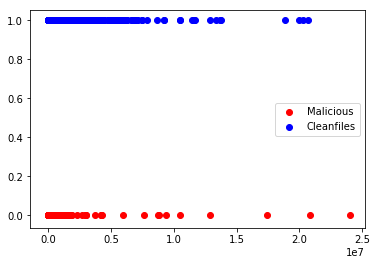

In [18]:

#lets plot
#let's label our dataframes
Virus_files['clean'] = 0
Benign_files['clean'] = 1

import seaborn
%matplotlib inline
fig,ax = plt.subplots()
x = Virus_files['IATRVA']
y = Virus_files['clean']
ax.scatter(x,y,color='r',label='Malicious')
x1 = Benign_files['IATRVA']
y1 = Benign_files['clean']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

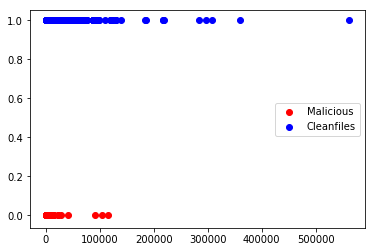

In [19]:
%matplotlib inline
fig,ax = plt.subplots()
x = Virus_files['ExportSize']
y = Virus_files['clean']
ax.scatter(x,y,color='r',label='Malicious')
x1 = Benign_files['ExportSize']
y1 = Benign_files['clean']
ax.scatter(x1,y1,color='b',label='Cleanfiles')
ax.legend(loc="right")

In [20]:

dataset_Merged = [Virus_files, Benign_files]
dataset = pd.concat(dataset_Merged)
vec2csv(dataset.transpose(), 'Final_DatasetPE.csv');

In [22]:

dataset.groupby(dataset['clean']).size()

clean
0    1607
1    8025
dtype: int64

In [23]:
X = dataset.drop(['Unnamed: 0', 'clean', 'filename'],axis=1).values
y = dataset['clean'].values

In [25]:
dataset.count()

Unnamed: 0                     9632
AddressOfEntryPoint            9632
Characteristics                9632
Checksum                       9632
DebugRVA                       9632
DebugSize                      9632
Dll                            9632
ExportRVA                      9632
ExportSize                     9632
IATRVA                         9632
ImageBase                      9632
ImageVersion                   9632
LinkerVersion                  9632
Machine                        9632
MajorImageVersion              9632
MajorOperatingSystemVersion    9632
MinorImageVersion              9632
NumberOfRvaAndSizes            9632
NumberOfSections               9632
NumberOfSymbol                 9632
OSVersion                      9632
PointerToSymbolTable           9632
ResSize                        9632
SizeOfCode                     9632
SizeOfHeaders                  9632
SizeOfHeapReserve              9632
SizeOfImage                    9632
SizeOfOptionalHeader        

In [26]:
extratrees = ek.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
imp_features = X_new.shape[1]

In [27]:
imp_features

8L

In [28]:
X.shape

(9632L, 30L)

In [29]:
X_new.shape

(9632L, 8L)

In [30]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_new, y ,test_size=0.2)

In [31]:
features = []
index = numpy.argsort(extratrees.feature_importances_)[::-1][:imp_features]

In [32]:
for f in range(imp_features):
    print("%d. feature %s (%f)" % (f + 1, dataset.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(dataset.columns[2+f])

1. feature MinorImageVersion (0.217291)
2. feature Dll (0.157238)
3. feature SizeOfStackReserve (0.120841)
4. feature Checksum (0.097574)
5. feature ExportRVA (0.086426)
6. feature Machine (0.066722)
7. feature MajorOperatingSystemVersion (0.062175)
8. feature filename (0.039750)


Text(0.5,1,'Feature importances')

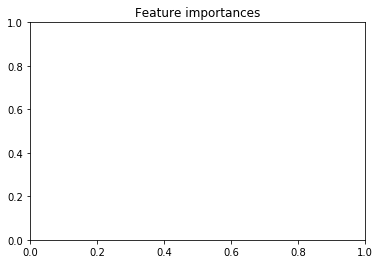

In [33]:
plt.figure()
plt.title("Feature importances" )

In [34]:
 clf = ek.AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X_train, y_train)
scores.mean()                             

0.9946789482555608

In [35]:
clf = ek.RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print ("RandomForest: %s " %(score))

RandomForest: 0.9968863518422418 


In [36]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LinearRegression":LinearRegression()   
}

In [39]:

results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

RandomForest : 0.9963674104826155 
GradientBoosting : 0.9927348209652309 
GNB : 0.885313959522574 
DecisionTree : 0.9958484691229891 
LinearRegression : 0.749603532136496 
Adaboost : 0.9974052932018682 


In [38]:
winner = max(results, key=results.get)
print('\nWinner algorithm is %s with a %f %% success' % (winner, results[winner]*100))



Winner algorithm is Adaboost with a 99.740529 % success


In [41]:
joblib.dump(model[winner],'classifier/classifier.pkl')

['classifier/classifier.pkl']

In [42]:
open('classifier/features.pkl', 'w').write(pickle.dumps(features))

In [43]:
clf = model[winner]
res = clf.predict(X_new)
mt = confusion_matrix(y, res)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))

False positive rate : 1.182327 %
False negative rate : 0.174455 %


In [179]:
clf = model[winner]
res = clf.predict(X_new)
mt = confusion_matrix(y, res)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))

False positive rate : 1.685731 %
False negative rate : 0.074766 %


In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [182]:
clf1 = ek.RandomForestClassifier()
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("TN = ",tn)
print("TP = ",tp)
print("FP = ",fp)
print("FN = ",fn)

TN =  337
TP =  1587
FP =  12
FN =  2


In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPClassifier(hidden_layer_sizes=(12,12,12,12,12,12))

mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
print("TN = ",tn)
print("TP = ",tp)
print("FP = ",fp)
print("FN = ",fn)

TN =  472
TP =  2404
FP =  18
FN =  12
